In [68]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# warning
import warnings
warnings.filterwarnings('ignore')

In [69]:
# loading data set for fashion MNIST
fashion_mnist_df = pd.read_csv('datasets/fashion-mnist.csv')
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# shape of dataset
fashion_mnist_df.shape

(60000, 785)

In [71]:
# selecting only 50% of data
#fashion_mnist_df = fashion_mnist_df.sample(frac=1).reset_index(drop=True)
#fashion_mnist_df.shape

In [72]:
# viewing data
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# creating lookup dictonary for the classifications
LOOKUP = {
         0 : 'T-Shirt',
         1 : 'Trouser',
         2 : 'Pullover',
         3 : 'Dress',
         4 : 'Coat',
         5 : 'Sandal',
         6 : 'Shirt',
         7 : 'Sneaker',
         8 : 'Bag',
         9 : 'Ankle Boot'
         }

In [74]:
# displaying image
def display_image(features, actual_label):
    print('Actual Label :', LOOKUP[actual_label])
    plt.imshow(features.reshape(28, 28))

In [75]:
# spliting data
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]
Y = fashion_mnist_df['label']

In [76]:
# showing X data
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# showing Y data
Y.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [78]:
# looking first 100 pixels
X.loc[5].values[:100]

array([  0,   0,   0,   5,   4,   5,   5,   3,   5,   6,   2,   0,   0,
         0,   0,   0,   0,   0,   2,   3,   7,   4,   4,   5,   5,   0,
         0,   0,   0,   0,   0,   4,   5,   4,   5,  11,   2,   0,   0,
        21, 231, 156, 134, 177, 194,   1,   0,   0,   0,  10,   5,   5,
         4,   0,   0,   0,   0,   0,   0,   4,   5,   3,   7,   0,   0,
        26, 112, 168, 162, 212, 226, 199, 146, 168, 124,  25,   0,   0,
         0,   4,   5,   0,   0,   0,   0,   0,   0,   4,   5,   8,   0,
        15,  95, 142, 170, 144, 123, 156, 172, 140])

Actual Label : Coat


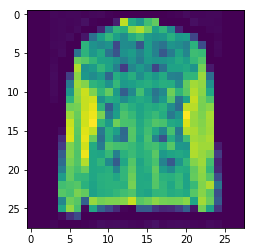

In [79]:
# diplaying images
display_image(X.loc[5].values, Y.loc[5])

Actual Label : Pullover


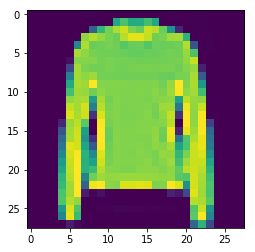

In [80]:
# diplaying images
display_image(X.loc[567].values, Y.loc[567])

Actual Label : Ankle Boot


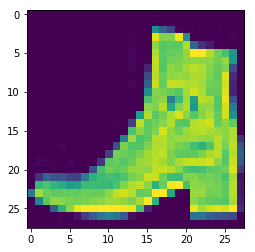

In [81]:
# diplaying images
display_image(X.loc[15088].values, Y.loc[15088])

In [82]:
# scaling features between 0 and 1 by dividing X by 255
X = X/255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [83]:
# spliting data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [84]:
# getting shape of train data
x_train.shape, y_train.shape

((48000, 784), (48000,))

In [85]:
# getting shape of test data
x_test.shape, y_test.shape

((12000, 784), (12000,))

In [86]:
# defining summarize function
def summarize_classification(y_test, y_pred, avg_method='weighted'):
    accuracy = accuracy_score(y_test, y_pred, normalize=True)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print('Test data count :', len(y_test))
    print('Accuracy Score :', accuracy)
    print('Precision Score :', precision)
    print('Recall Score :', recall)
    print()

In [87]:
# buliding logistic model
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [65]:
# predicting y values
y_pred = logistic_model.predict(x_test)

In [66]:
# summarizing 
summarize_classification(y_test, y_pred)

Test data count : 6000
Accuracy Score : 0.8395
Precision Score : 0.8392513883906381
Recall Score : 0.8395

